In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 2,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (3,4),
                #"ewc_lambda" : (400,400)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [6]:
device = get_device(0)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-30 10:12:38,384] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:05<00:00,  1.44s/it]
[I 2024-07-30 10:12:51,812] Trial 0 finished with value: 93.04562666666669 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 93.04562666666669.
100%|██████████| 4/4 [00:05<00:00,  1.39s/it]
[I 2024-07-30 10:13:04,020] Trial 1 finished with value: 92.54770666666668 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 4}. Best is trial 0 with value: 93.04562666666669.
  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|██▌       | 1/4 [00:01<00:04,  1.38s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████     | 2/4 [00:02<00:02,  1.37s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████▌  | 3/4 [00:04<00:01,  1.37s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████| 4/4 [00:05<00:00,  1.37s/it]
[I 2024-07-30 10:13:13,961] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 4/4 [00:05<00:00,  1.34s/it]
[I 2024-07-30 10:13:30,911] Trial 0 finished with value: 91.16733333333332 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 91.16733333333332.
100%|██████████| 4/4 [00:05<00:00,  1.31s/it]
[I 2024-07-30 10:13:47,714] Trial 1 finished with value: 90.42360000000005 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 4}. Best is trial 0 with value: 91.16733333333332.
  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|██▌       | 1/4 [00:01<00:03,  1.32s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████     | 2/4 [00:02<00:02,  1.32s/it]

In and out sizes :
fc1 : in = 784, out = 252
fc2 : in = 252, out = 200
fc3 : in = 200, out = 10


 75%|███████▌  | 3/4 [00:03<00:01,  1.32s/it]

In and out sizes :
fc1 : in = 784, out = 252
fc2 : in = 252, out = 200
fc3 : in = 200, out = 10


100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
[I 2024-07-30 10:13:57,468] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 4/4 [00:05<00:00,  1.32s/it]
[I 2024-07-30 10:14:19,321] Trial 0 finished with value: 85.4166577777778 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 85.4166577777778.
100%|██████████| 4/4 [00:05<00:00,  1.42s/it]
[I 2024-07-30 10:14:41,635] Trial 1 finished with value: 86.60410666666668 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 4}. Best is trial 1 with value: 86.60410666666668.
  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 252
fc2 : in = 252, out = 200
fc3 : in = 200, out = 10


 25%|██▌       | 1/4 [00:01<00:04,  1.41s/it]

In and out sizes :
fc1 : in = 784, out = 252
fc2 : in = 252, out = 200
fc3 : in = 200, out = 10


 50%|█████     | 2/4 [00:02<00:02,  1.40s/it]

In and out sizes :
fc1 : in = 784, out = 252
fc2 : in = 252, out = 200
fc3 : in = 200, out = 10


 75%|███████▌  | 3/4 [00:04<00:01,  1.37s/it]

In and out sizes :
fc1 : in = 784, out = 252
fc2 : in = 252, out = 200
fc3 : in = 200, out = 10


100%|██████████| 4/4 [00:05<00:00,  1.37s/it]


## Visualize results

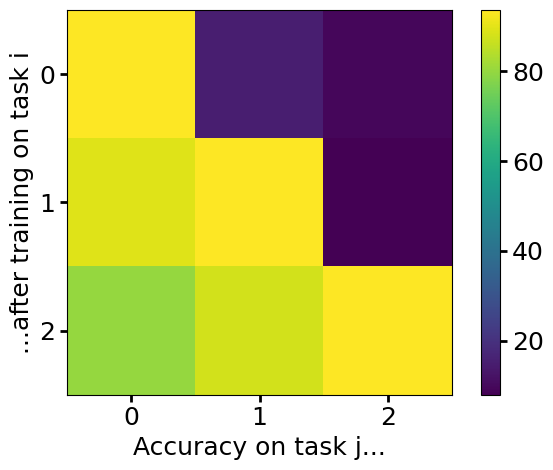

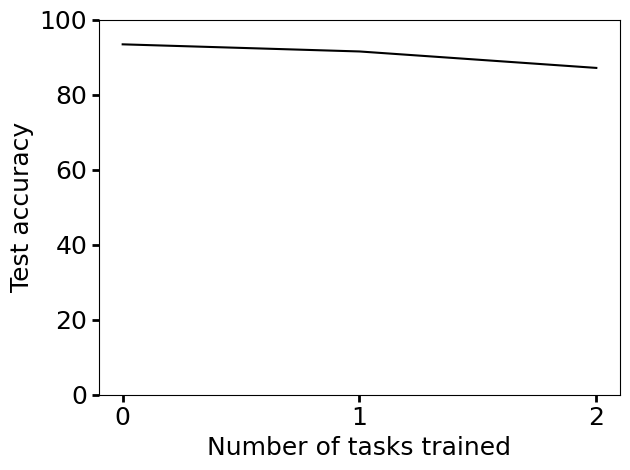

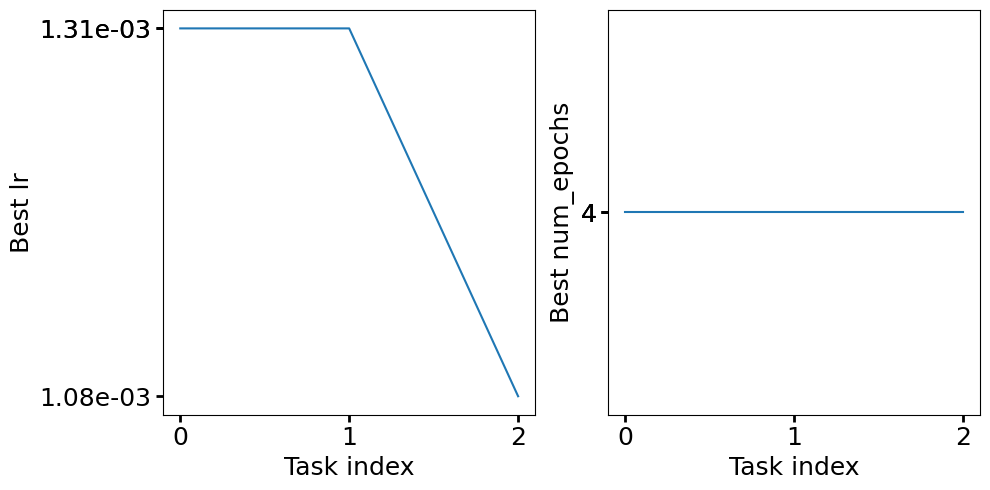

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|██▌       | 1/4 [00:01<00:04,  1.38s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████     | 2/4 [00:02<00:02,  1.40s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████▌  | 3/4 [00:04<00:01,  1.39s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|██████████| 4/4 [00:05<00:00,  1.39s/it]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 25%|██▌       | 1/4 [00:01<00:04,  1.38s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|█████     | 2/4 [00:02<00:02,  1.39s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 75%|███████▌  | 3/4 [00:04<00:01,  1.40s/it]

In and out sizes :
fc1 : in = 784, out = 236
fc2 : in = 236, out = 200
fc3 : in = 200, out = 10


100%|██████████| 4/4 [00:05<00:00,  1.40s/it]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 236
fc2 : in = 236, out = 200
fc3 : in = 200, out = 10


 25%|██▌       | 1/4 [00:01<00:04,  1.42s/it]

In and out sizes :
fc1 : in = 784, out = 236
fc2 : in = 236, out = 200
fc3 : in = 200, out = 10


 50%|█████     | 2/4 [00:02<00:02,  1.44s/it]

In and out sizes :
fc1 : in = 784, out = 236
fc2 : in = 236, out = 200
fc3 : in = 200, out = 10


 75%|███████▌  | 3/4 [00:04<00:01,  1.42s/it]

In and out sizes :
fc1 : in = 784, out = 236
fc2 : in = 236, out = 200
fc3 : in = 200, out = 10


100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


## Visualize validation

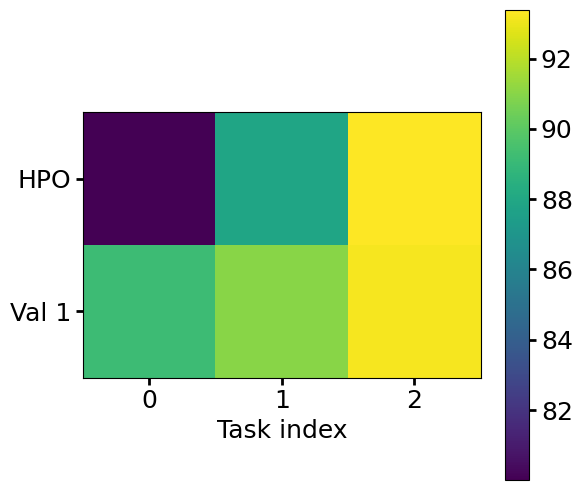

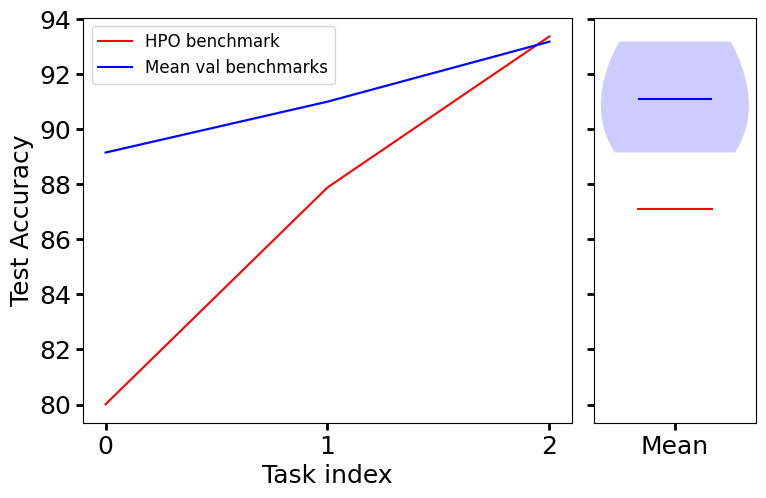

In [11]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [12]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)